# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

%matplotlib inline 

# Import API key, .env
from decouple import config
api_key = config('weather_api_key')

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# URL for GET requests to retrieve weather data
url = "http://api.openweathermap.org/data/2.5/weather?q="

In [8]:
response_json = []

In [9]:
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
ecount = 0
count = 0
sets = 0

In [10]:
# Retrieving data and converting it into JSON

print('Beginning Data Retrieval')
print('-----------------------------')

for x in range(len(cities)):
    
    try:        
        print(f'Making request: {x}, set {sets} for ID: {cities[x]}')
        post_response = requests.get(f'{url}{cities[x]}&appid={api_key}&units=imperial')
        response_json.append(post_response.json())
    except:
        print(f'Some error requesting {x}: skipping')
        ecount += 1
    count += 1
    if count == 59:
        print(f'Hold for API Limit - 60 seconds')
        #time.sleep(60)
        sets += 1
        count = 1
        # reset record counter to count the next 60 cities before another pause.
              
print("----------------------------------------")
print("Processing Completed")
print(f"{ecount} errors encounted")
print(f"Data for {len(response_json)} cities recorded")
print("----------------------------------------")
                                     

Beginning Data Retrieval
-----------------------------
Making request: 0, set 0 for ID: gizo
Making request: 1, set 0 for ID: severo-kurilsk
Making request: 2, set 0 for ID: adrar
Making request: 3, set 0 for ID: shagonar
Making request: 4, set 0 for ID: port hardy
Making request: 5, set 0 for ID: bah
Making request: 6, set 0 for ID: avarua
Making request: 7, set 0 for ID: carnarvon
Making request: 8, set 0 for ID: bluff
Making request: 9, set 0 for ID: vaini
Making request: 10, set 0 for ID: yar-sale
Making request: 11, set 0 for ID: agirish
Making request: 12, set 0 for ID: castro
Making request: 13, set 0 for ID: hobart
Making request: 14, set 0 for ID: sedelnikovo
Making request: 15, set 0 for ID: sao filipe
Making request: 16, set 0 for ID: tiksi
Making request: 17, set 0 for ID: juneau
Making request: 18, set 0 for ID: busselton
Making request: 19, set 0 for ID: quatre cocos
Making request: 20, set 0 for ID: belushya guba
Making request: 21, set 0 for ID: ushuaia
Making request: 

Making request: 185, set 3 for ID: reconquista
Making request: 186, set 3 for ID: khani
Making request: 187, set 3 for ID: zhigansk
Making request: 188, set 3 for ID: lompoc
Making request: 189, set 3 for ID: taoudenni
Making request: 190, set 3 for ID: bambous virieux
Making request: 191, set 3 for ID: manta
Making request: 192, set 3 for ID: kuche
Making request: 193, set 3 for ID: tura
Making request: 194, set 3 for ID: fara in sabina
Making request: 195, set 3 for ID: necochea
Making request: 196, set 3 for ID: sumbawa
Making request: 197, set 3 for ID: kawardha
Making request: 198, set 3 for ID: hokitika
Making request: 199, set 3 for ID: khatanga
Making request: 200, set 3 for ID: rafai
Making request: 201, set 3 for ID: port lincoln
Making request: 202, set 3 for ID: atambua
Making request: 203, set 3 for ID: pangkalanbuun
Making request: 204, set 3 for ID: novyy urengoy
Making request: 205, set 3 for ID: umm durman
Making request: 206, set 3 for ID: nishihara
Making request: 20

Making request: 370, set 6 for ID: beringovskiy
Making request: 371, set 6 for ID: port macquarie
Making request: 372, set 6 for ID: fort nelson
Making request: 373, set 6 for ID: alappuzha
Making request: 374, set 6 for ID: saint-augustin
Making request: 375, set 6 for ID: maralal
Making request: 376, set 6 for ID: atasu
Making request: 377, set 6 for ID: louisbourg
Making request: 378, set 6 for ID: palabuhanratu
Making request: 379, set 6 for ID: tamsweg
Making request: 380, set 6 for ID: gusau
Making request: 381, set 6 for ID: umzimvubu
Making request: 382, set 6 for ID: bonaventure
Making request: 383, set 6 for ID: harper
Making request: 384, set 6 for ID: lopatyn
Making request: 385, set 6 for ID: sao felix do xingu
Making request: 386, set 6 for ID: newark
Making request: 387, set 6 for ID: walvis bay
Making request: 388, set 6 for ID: jian
Making request: 389, set 6 for ID: sainte-marie
Making request: 390, set 6 for ID: trincomalee
Making request: 391, set 6 for ID: viranseh

Making request: 552, set 9 for ID: tsiroanomandidy
Making request: 553, set 9 for ID: north bend
Making request: 554, set 9 for ID: saint anthony
Making request: 555, set 9 for ID: cumaribo
Making request: 556, set 9 for ID: kisarazu
Making request: 557, set 9 for ID: dunda
Making request: 558, set 9 for ID: beipiao
Making request: 559, set 9 for ID: hirado
Making request: 560, set 9 for ID: pokrovsk
Making request: 561, set 9 for ID: san cristobal
Making request: 562, set 9 for ID: tonekabon
Making request: 563, set 9 for ID: tornio
Making request: 564, set 9 for ID: kirkwall
Making request: 565, set 9 for ID: sciacca
Making request: 566, set 9 for ID: meyungs
Making request: 567, set 9 for ID: broome
Making request: 568, set 9 for ID: altamira
Making request: 569, set 9 for ID: kirovskiy
Making request: 570, set 9 for ID: arica
Making request: 571, set 9 for ID: ust-kuyga
Making request: 572, set 9 for ID: ushumun
Making request: 573, set 9 for ID: kautokeino
Making request: 574, set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
#print(response_json)

In [12]:
ecount=0
for y in range(len(response_json)):
    try:
        city.append(response_json[y]['name'])
        cloudiness.append(response_json[y]['clouds']['all'])
        country.append(response_json[y]['sys']['country'])
        date.append(response_json[y]['dt'])
        humidity.append(response_json[y]['main']['humidity'])
        lat.append(response_json[y]['coord']['lat'])
        lng.append(response_json[y]['coord']['lon'])
        max_temp.append(response_json[y]['main']['temp_max'])
        wind_speed.append(response_json[y]['wind']['speed'])
    except KeyError:
        print(f"Ok, something is wrong so skipping {y}.")
        ecount+=1
print("-----------------------------------------")
print("Done reading response_json")
print(f"{ecount} errors encounterd")
print("-----------------------------------------")

Ok, something is wrong so skipping 14.
Ok, something is wrong so skipping 20.
Ok, something is wrong so skipping 38.
Ok, something is wrong so skipping 71.
Ok, something is wrong so skipping 81.
Ok, something is wrong so skipping 86.
Ok, something is wrong so skipping 89.
Ok, something is wrong so skipping 91.
Ok, something is wrong so skipping 104.
Ok, something is wrong so skipping 107.
Ok, something is wrong so skipping 109.
Ok, something is wrong so skipping 163.
Ok, something is wrong so skipping 167.
Ok, something is wrong so skipping 174.
Ok, something is wrong so skipping 181.
Ok, something is wrong so skipping 192.
Ok, something is wrong so skipping 196.
Ok, something is wrong so skipping 205.
Ok, something is wrong so skipping 208.
Ok, something is wrong so skipping 218.
Ok, something is wrong so skipping 238.
Ok, something is wrong so skipping 293.
Ok, something is wrong so skipping 295.
Ok, something is wrong so skipping 313.
Ok, something is wrong so skipping 331.
Ok, some

In [13]:
df = pd.DataFrame([city, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed])

In [14]:
df = df.transpose()

In [15]:
df = df.rename(columns={0:"City", 1:"Cloudiness", 2:"Country", 3:"Date", 4 :"Humidity",5:"Lat",6 :"Lng",7: "Max Temp", 8 :"Wind Speed"})


In [16]:
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Gizo Government Station,88,SB,1601409551,79,-8.1,156.84,80.83,11.77
1,Severo-Kuril'sk,89,RU,1601409552,90,50.68,156.12,51.49,10.54
2,Adrar,0,MR,1601409552,16,20.5,-10.07,96.24,8.59
3,Shagonar,100,RU,1601409552,64,51.53,92.8,42.66,1.16
4,Port Hardy,40,CA,1601409553,100,50.7,-127.42,55.4,3.36
...,...,...,...,...,...,...,...,...,...
567,Canyon,0,US,1601409719,15,34.98,-101.92,80.01,3
568,Grand Gaube,100,MU,1601409720,81,-20.01,57.66,72,1.99
569,Moose Factory,90,CA,1601409720,100,51.26,-80.61,50,11.41
570,Sept-Îles,75,CA,1601409712,82,50.2,-66.38,66.2,9.17


In [23]:
#export dataframe to a csv
df.to_csv(output_data_file, encoding='utf-8',index=False)

In [37]:
from datetime import datetime
dt = datetime.now().date()

In [63]:
def plotme(x_value, y_value, x_label,y_label,title):
    plt.style.use('seaborn')
    fig = plt.figure(figsize= (10,6))
    plt.scatter(x = x_value, y = y_value, data = df, color = 'forestgreen')
    plt.title(f'{title} {dt}', size = 30)
    plt.xlabel(x_label, size =25)
    plt.xticks(size = 15)
    plt.ylabel(y_label, size = 25)
    plt.yticks(size = 15)
    plt.savefig(f'{title}.png')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

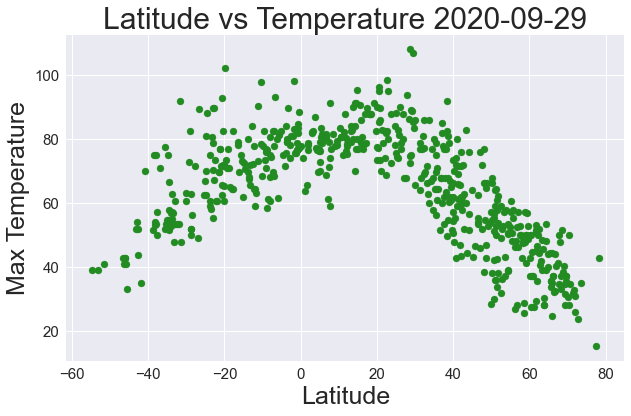

In [64]:
plotme('Lat','Max Temp','Latitude','Max Temperature','Latitude vs Temperature')


#### Latitude vs. Humidity Plot

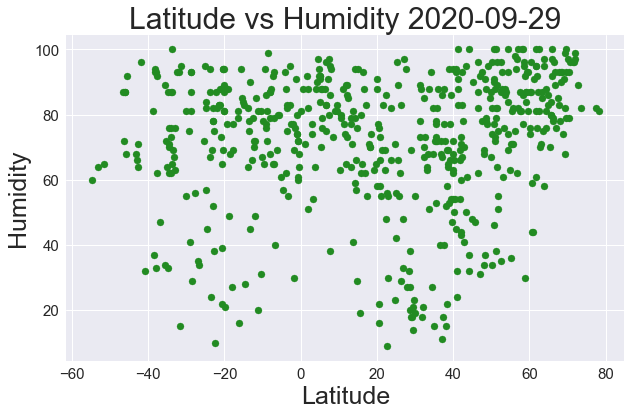

In [65]:
plotme('Lat','Humidity','Latitude','Humidity','Latitude vs Humidity')


#### Latitude vs. Cloudiness Plot

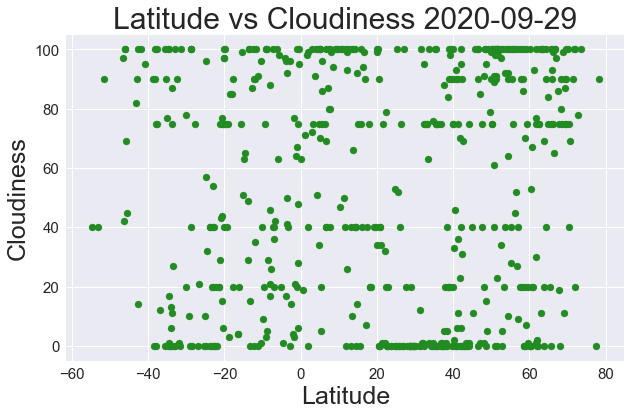

In [57]:
plotme('Lat','Cloudiness','Latitude','Cloudiness','Latitude vs Cloudiness')

#### Latitude vs. Wind Speed Plot

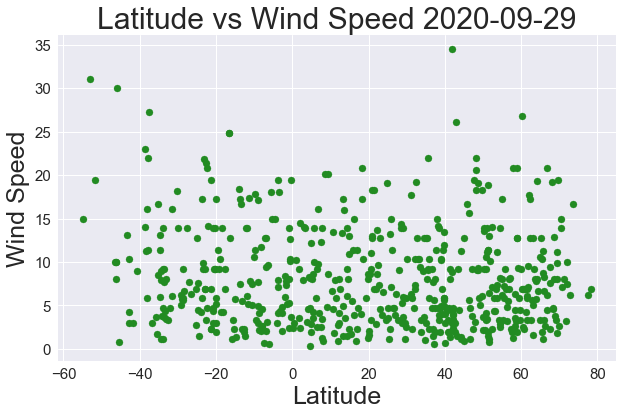

In [61]:
plotme('Lat','Wind Speed','Latitude','Wind Speed','Latitude vs Wind Speed')

## Linear Regression

In [7]:
# OPTIONAL: Create a function to create Linear Regression plots


In [8]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression